In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [33]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [36]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [37]:
#Here we are only choosing only some features from the total titanic dataset for our model to get trained only on this

features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

In [38]:
# missing data filling

from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy="median")
df[["age"]] = imp_median.fit_transform(df[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
df[["embarked"]] = imp_freq.fit_transform(df[["embarked"]])

In [39]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [40]:
# Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["sex"] = le.fit_transform(df["sex"])
df["embarked"] = le.fit_transform(df["embarked"])

In [41]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [42]:
X = df[features]
y = df[target]

X.head()

,pclass,sex,fare,embarked,age
0,3,1,7.2500,2,22.0
1,1,0,71.2833,0,38.0
2,3,0,7.9250,2,26.0
3,1,0,53.1000,2,35.0
4,3,1,8.0500,2,35.0


In [43]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [44]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Decision tree regressor

In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.770949720670391


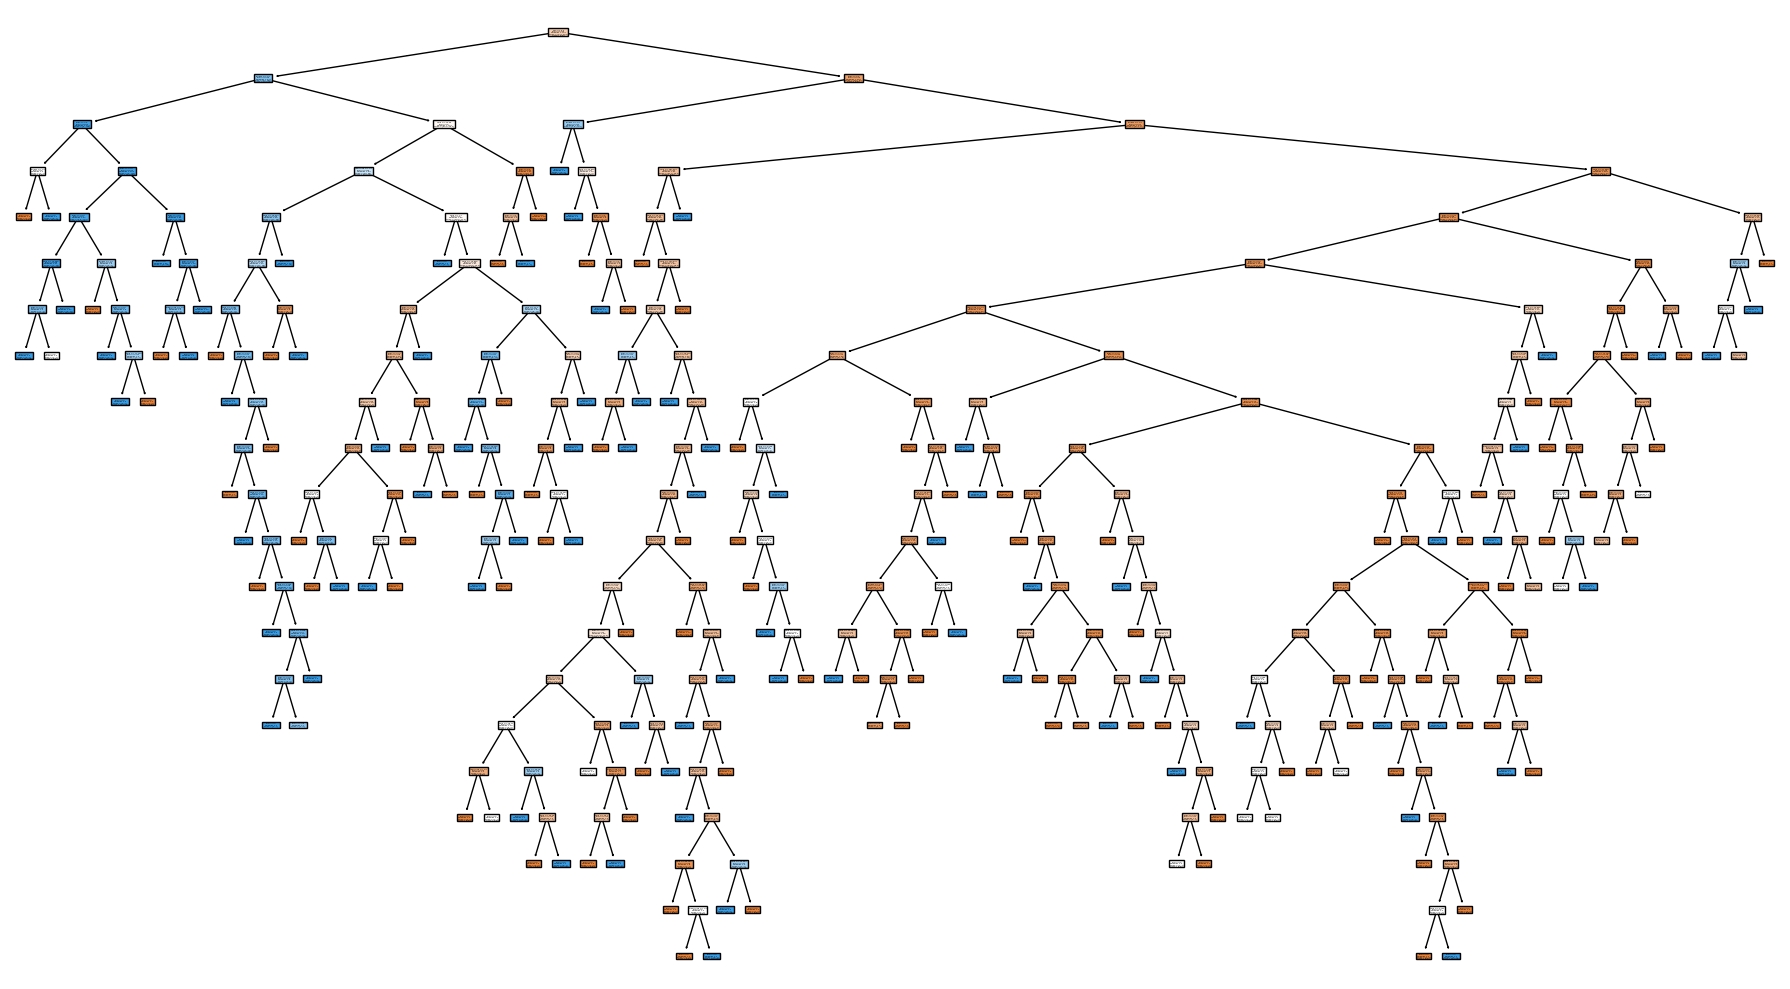

In [48]:
# Plotting decision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
    # max_depth=2
)
plt.tight_layout()
plt.show()

# Decision tree with Pre-Pruning

In [49]:
max_depth = [2,3,4,5,6,7,8,9,10]

for i in max_depth:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)

    # we can directly calc accuracy using the inbuilt fnx called score
    acc = model.score(X_test, y_test)
    print(f"depth={i}, accuracy={acc}")

depth=2, accuracy=0.7653631284916201
depth=3, accuracy=0.7988826815642458
depth=4, accuracy=0.7988826815642458
depth=5, accuracy=0.7988826815642458
depth=6, accuracy=0.8044692737430168
depth=7, accuracy=0.7988826815642458
depth=8, accuracy=0.7821229050279329
depth=9, accuracy=0.7932960893854749
depth=10, accuracy=0.7988826815642458


# Decision tree with Post-Pruning

In [50]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [51]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 6.68806849e-05 1.45921494e-04
 1.84428555e-04 2.00642055e-04 2.34082397e-04 2.34082397e-04
 3.51123596e-04 4.68164794e-04 4.68164794e-04 5.61797753e-04
 6.24219725e-04 6.67991230e-04 7.02247191e-04 7.02247191e-04
 8.19288390e-04 8.19288390e-04 8.32292967e-04 8.42696629e-04
 8.42696629e-04 8.42696629e-04 8.94231048e-04 8.99610781e-04
 9.24769963e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.88347898e-04 1.00253471e-03 1.05337079e-03 1.07400895e-03
 1.08038029e-03 1.11865144e-03 1.12359551e-03 1.12359551e-03
 1.13139825e-03 1.18841832e-03 1.22566125e-03 1.22893258e-03
 1.22893258e-03 1.24361593e-03 1.24843945e-03 1.27565833e-03
 1.30996111e-03 1.33761370e-03 1.37044603e-03 1.47927070e-03
 1.51142557e-03 1.54072312e-03 1.56675436e-03 1.60434338e-03
 1.66892062e-03 1.75561798e-03 1.76144762e-03 1.86751451e-03
 2.10674157e-03 2.34082397e-03 2.41226470e-03 2.64273538e-03
 2.69412911e-03 3.43770913e-03 3.56327570e-03 5.47433606e-03
 9.05540038e-03 1.392950

In [52]:
trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))

In [53]:
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha

In [54]:
best_alpha

np.float64(0.0015407231242023183)

In [55]:
best_acc

0.8379888268156425

In [56]:
best_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


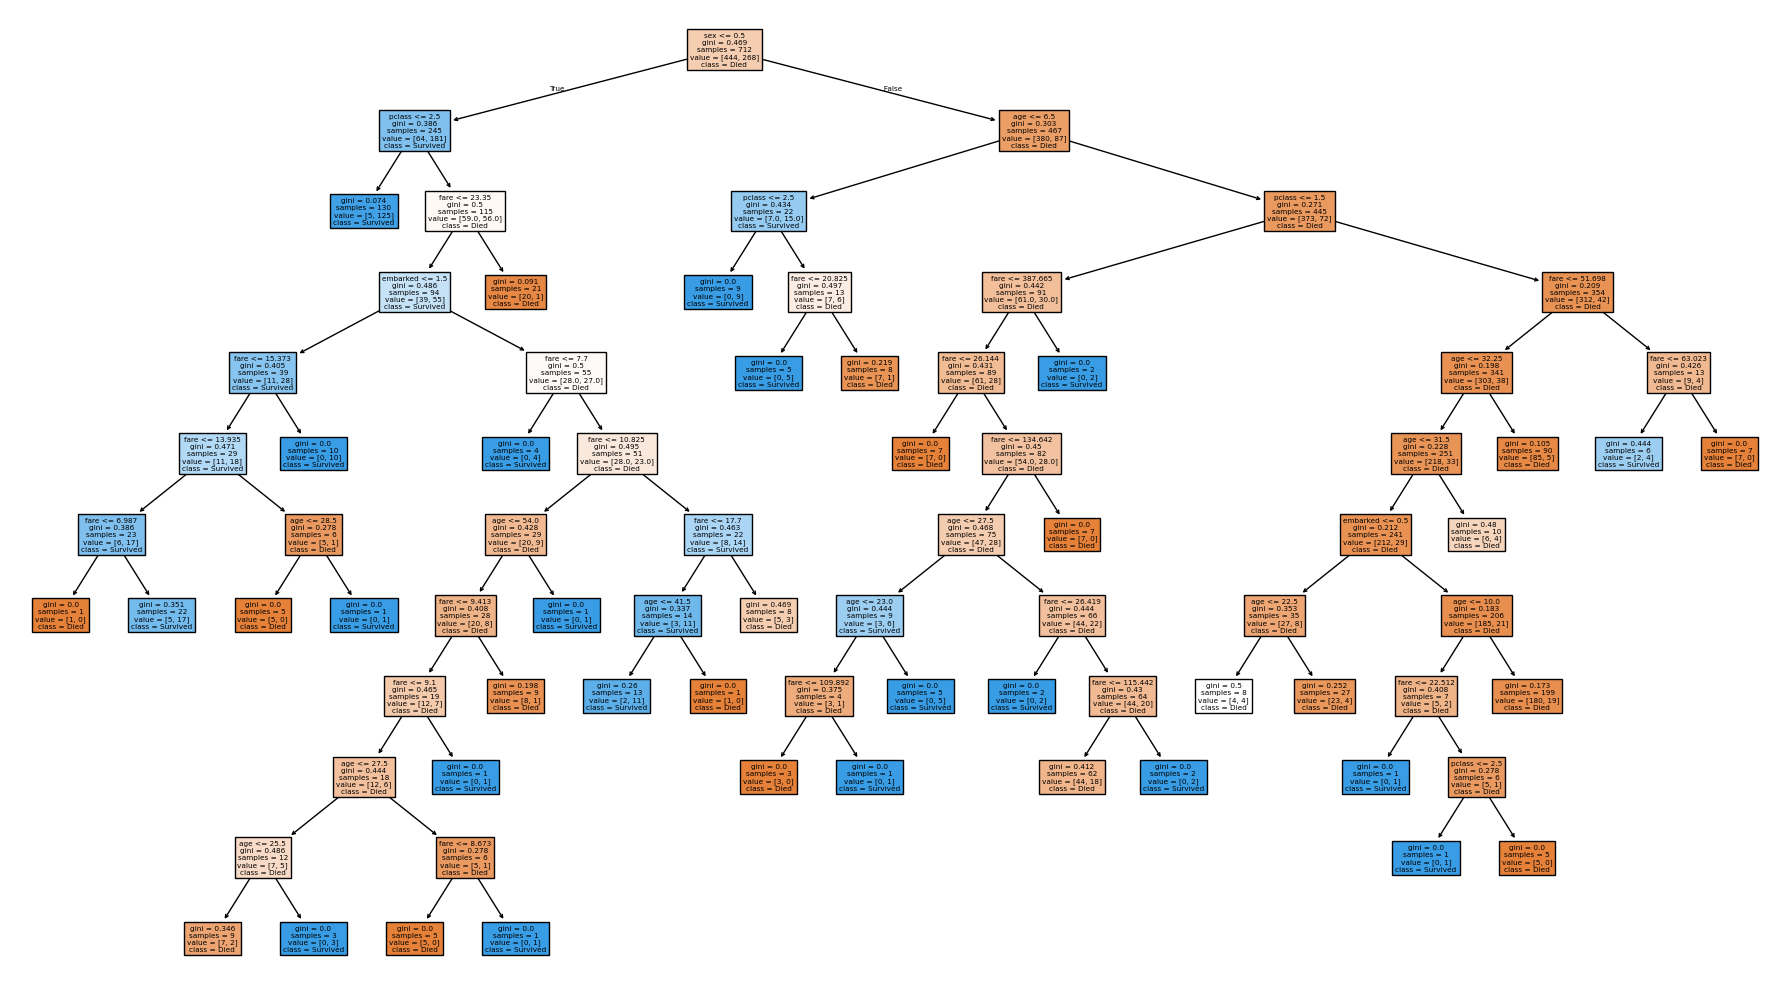

In [57]:
plt.figure(figsize=(18,10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
)
plt.tight_layout()
plt.show()

In [58]:
print(best_model.score(X_test, y_test))

0.8379888268156425


# Decision tree classifier

In [59]:
from sklearn.datasets import load_diabetes

In [60]:
df = load_diabetes(as_frame=True).frame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [61]:
X = df.drop(columns = ("target"))
y = df["target"]

In [64]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [68]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [70]:
from sklearn.metrics import r2_score, mean_squared_error

# Here we are checking both training and testing results
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MSE train:", mean_squared_error(y_train, y_pred_train))
print("MSE test:", mean_squared_error(y_test, y_pred_test))

print("r2 train:", r2_score(y_train, y_pred_train))
print("r2 test:", r2_score(y_test, y_pred_test))

MSE train: 0.0
MSE test: 4725.932584269663
r2 train: 1.0
r2 test: 0.10800354376545573


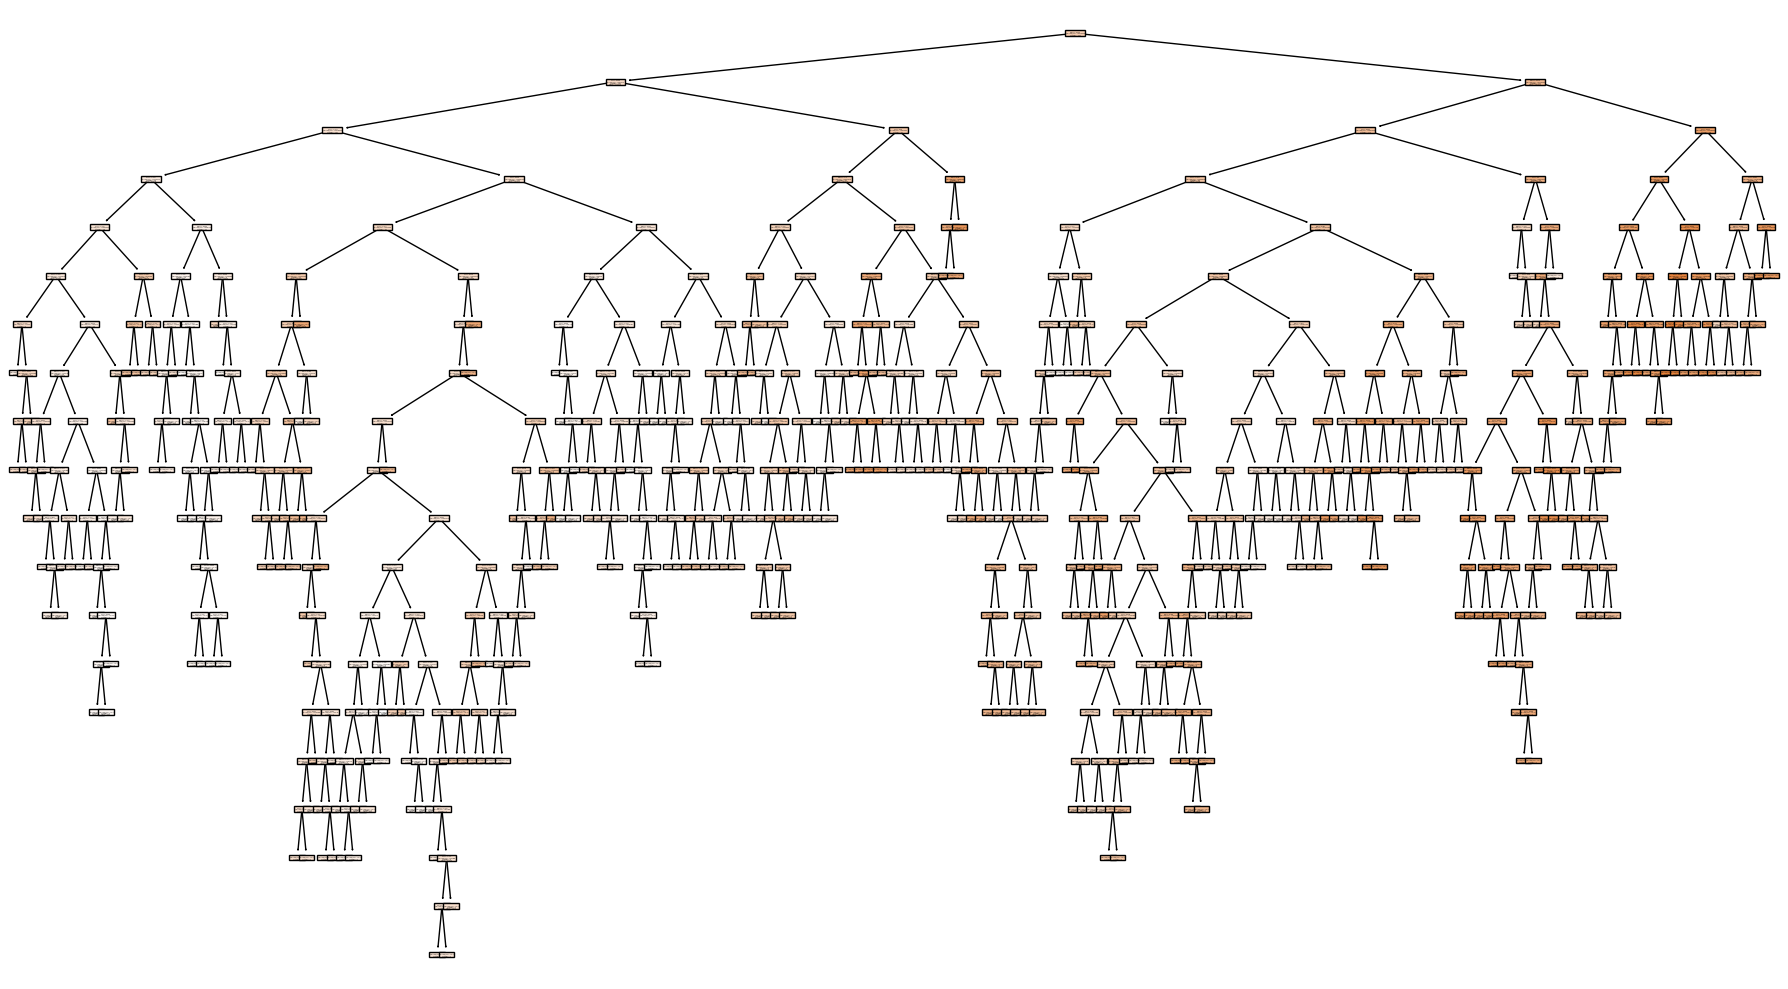

In [78]:
# plotting DT regressor

from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))

plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    # max_depth=1
)
plt.tight_layout()